In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
corr_thresh=0.18

In [4]:
#load the correlation results
df_modules=pd.read_csv('/Users/fsfatemi/local_AD/Correlation_results/module_correlations_leiden_all.csv')
df_modules=df_modules.sort_values('correlation',ascending=False)
df_modules['cluster_l']=df_modules['cluster'].apply(lambda x: ast.literal_eval(x))
df_modules = df_modules.sample(frac=1, random_state=42).reset_index(drop=True)
#get the clusters with correlations more than 0.18 (this 0.18 is arbitrary and can be changed)
top_genes=df_modules[df_modules['correlation']>corr_thresh]['cluster_l']

In [5]:
df_modules[df_modules['correlation']>corr_thresh]

,cluster,cluster size,resolution,network,method,correlation,cluster_l
714,"['ENSG00000113734.18', 'ENSG00000185090.15', '...",10,100.0,knn_4_pos,leiden_unweighted,0.187005,"[ENSG00000113734.18, ENSG00000185090.15, ENSG0..."
888,"['ENSG00000121903.15', 'ENSG00000264006.9', 'E...",499,5.0,knn_8,leiden_weighted,0.182542,"[ENSG00000121903.15, ENSG00000264006.9, ENSG00..."
1367,"['ENSG00000143157.12', 'ENSG00000111727.12', '...",99,10.0,knn_4_pos,leiden_weighted,0.186470,"[ENSG00000143157.12, ENSG00000111727.12, ENSG0..."
2824,"['ENSG00000160318.6', 'ENSG00000100320.24', 'E...",87,20.0,knn_4,leiden_weighted,0.185348,"[ENSG00000160318.6, ENSG00000100320.24, ENSG00..."
3017,"['ENSG00000169252.6', 'ENSG00000137135.18', 'E...",14,100.0,knn_11,leiden_unweighted,0.191022,"[ENSG00000169252.6, ENSG00000137135.18, ENSG00..."
...,...,...,...,...,...,...,...
102192,"['ENSG00000171522.6', 'ENSG00000264522.6', 'EN...",168,10.0,knn_11,leiden_weighted,0.187162,"[ENSG00000171522.6, ENSG00000264522.6, ENSG000..."
102301,"['ENSG00000100450.13', 'ENSG00000175505.11', '...",3,100.0,knn_12_pos,leiden_weighted,0.192622,"[ENSG00000100450.13, ENSG00000175505.11, ENSG0..."
102375,"['ENSG00000221829.11', 'ENSG00000265491.5', 'E...",131,20.0,knn_9_pos,leiden_weighted,0.188385,"[ENSG00000221829.11, ENSG00000265491.5, ENSG00..."
102460,"['ENSG00000049449.10', 'ENSG00000115392.13', '...",52,20.0,knn_10_pos,leiden_unweighted,0.196436,"[ENSG00000049449.10, ENSG00000115392.13, ENSG0..."


In [9]:
#get the merged list of all genes in the top clusters
unique_gene_list = list(set(item for sublist in top_genes for item in sublist))
len(unique_gene_list)

1503

In [7]:
#load the annotation file
annotation_df=pd.read_csv('/Users/fsfatemi/local_AD/KBASE_datashare/Normalization/gene_annotation.cqn_tbl_total.24736_1140.csv')
annotation_df.head()

,Geneid,gc,len,gc_col,Chr,gene_type,gene_name
0,ENSG00000000419.14,0.395752,9276,n.s,chr20,protein_coding,DPM1
1,ENSG00000000457.14,0.413773,6883,n.s,chr1,protein_coding,SCYL3
2,ENSG00000000460.17,0.429816,5970,n.s,chr1,protein_coding,C1orf112
3,ENSG00000000938.13,0.570668,3382,n.s,chr1,protein_coding,FGR
4,ENSG00000000971.17,0.369406,15284,n.s,chr1,protein_coding,CFH


In [10]:
#covert gene ids to gene names
list_gene_names=[]
for g in unique_gene_list:
    gene_name=annotation_df[annotation_df['Geneid']==g]['gene_name'].iloc[0]
    if gene_name not in list_gene_names: list_gene_names.append(gene_name)

len(list_gene_names)


1503

In [18]:
#run the GO enrichment analysis
import gseapy as gp

In [ ]:
# enrichr_results = gp.enrichr(
# gene_list=list_gene_names,                        
# gene_sets="KEGG_2019_Human",    
# organism="Human",                          
# outdir=f"enrichr_results/clusters_with_corr_thresh_{corr_thresh}_number_of_genes_{len(list_gene_names)}",                  
# )

In [11]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Extract k
df_modules['k'] = df_modules['network'].str.extract(r'knn_(\d+)', expand=False).astype(int)


In [12]:

# Filter for k = 4 and resolution = 0.1
subset = df_modules[(df_modules['k'] == 4) 
                    & (df_modules['resolution'] == 0.1) 
                    & (df_modules['network']=='knn_4')
                    & (df_modules['method']=='leiden_weighted')].copy()
subset

,cluster,cluster size,resolution,network,method,correlation,cluster_l,k
348,"['ENSG00000256660.7', 'ENSG00000172322.14', 'E...",4,0.1,knn_4,leiden_weighted,0.099437,"[ENSG00000256660.7, ENSG00000172322.14, ENSG00...",4
867,"['ENSG00000185271.9', 'ENSG00000196220.17', 'E...",188,0.1,knn_4,leiden_weighted,0.000241,"[ENSG00000185271.9, ENSG00000196220.17, ENSG00...",4
3581,"['ENSG00000000419.14', 'ENSG00000000457.14', '...",4217,0.1,knn_4,leiden_weighted,-0.008206,"[ENSG00000000419.14, ENSG00000000457.14, ENSG0...",4
9567,"['ENSG00000163293.12', 'ENSG00000198515.16', '...",4,0.1,knn_4,leiden_weighted,-0.013353,"[ENSG00000163293.12, ENSG00000198515.16, ENSG0...",4
10867,"['ENSG00000075275.18', 'ENSG00000151490.15', '...",396,0.1,knn_4,leiden_weighted,-0.071802,"[ENSG00000075275.18, ENSG00000151490.15, ENSG0...",4
23241,"['ENSG00000173391.9', 'ENSG00000050628.21', 'E...",76,0.1,knn_4,leiden_weighted,-0.060724,"[ENSG00000173391.9, ENSG00000050628.21, ENSG00...",4
32698,"['ENSG00000170667.16', 'ENSG00000168255.20', '...",6,0.1,knn_4,leiden_weighted,-0.008659,"[ENSG00000170667.16, ENSG00000168255.20, ENSG0...",4
38222,"['ENSG00000228696.11', 'ENSG00000185829.19', '...",4,0.1,knn_4,leiden_weighted,-0.034407,"[ENSG00000228696.11, ENSG00000185829.19, ENSG0...",4
42736,"['ENSG00000111215.12', 'ENSG00000212128.2', 'E...",16,0.1,knn_4,leiden_weighted,0.034514,"[ENSG00000111215.12, ENSG00000212128.2, ENSG00...",4
43518,"['ENSG00000049323.16', 'ENSG00000127824.15', '...",230,0.1,knn_4,leiden_weighted,-0.095665,"[ENSG00000049323.16, ENSG00000127824.15, ENSG0...",4


In [13]:

# Reset index and assign module labels
subset = subset.reset_index(drop=True)
subset['module_name'] = ['M' + str(i + 1) for i in range(len(subset))]
subset['module_label'] = subset['module_name'] + ', res=0.1'

# Create DataFrame for heatmap
plot_df = pd.DataFrame([subset['correlation'].values], columns=subset['module_label'].values)


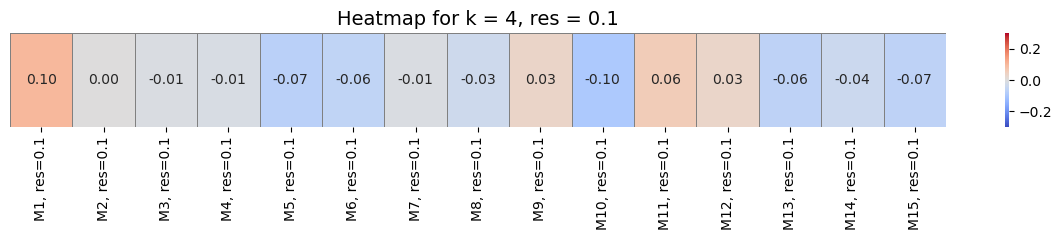

In [14]:

# Plot
plt.figure(figsize=(12, 2.5))
sns.heatmap(plot_df,
            cmap='coolwarm',
            cbar=True,
            vmin=-0.3, vmax=0.3,
            linewidths=0.5,
            linecolor='gray',
            annot=True,
            fmt=".2f")

plt.title('Heatmap for k = 4, res = 0.1', fontsize=14)
plt.yticks([])  # Hide y-axis ticks
plt.xticks(rotation=90)
plt.xlabel('')
plt.tight_layout()
plt.show()


In [15]:
# Filter for k = 4 and resolution = 0.1
subset = df_modules[(df_modules['k'] == 10) 
                    & (df_modules['resolution'] == 20) 
                    & (df_modules['network']=='knn_10')
                    & (df_modules['method']=='leiden_unweighted')].copy()

subset

,cluster,cluster size,resolution,network,method,correlation,cluster_l,k
475,"['ENSG00000013583.10', 'ENSG00000169733.12', '...",119,20.0,knn_10,leiden_unweighted,-0.068573,"[ENSG00000013583.10, ENSG00000169733.12, ENSG0...",10
498,"['ENSG00000162736.18', 'ENSG00000084731.15', '...",66,20.0,knn_10,leiden_unweighted,-0.011755,"[ENSG00000162736.18, ENSG00000084731.15, ENSG0...",10
608,"['ENSG00000127720.8', 'ENSG00000124786.13', 'E...",78,20.0,knn_10,leiden_unweighted,0.052019,"[ENSG00000127720.8, ENSG00000124786.13, ENSG00...",10
1232,"['ENSG00000116478.12', 'ENSG00000127804.13', '...",88,20.0,knn_10,leiden_unweighted,-0.121615,"[ENSG00000116478.12, ENSG00000127804.13, ENSG0...",10
3215,"['ENSG00000168066.22', 'ENSG00000243789.11', '...",64,20.0,knn_10,leiden_unweighted,0.036955,"[ENSG00000168066.22, ENSG00000243789.11, ENSG0...",10
...,...,...,...,...,...,...,...,...
101214,"['ENSG00000125970.12', 'ENSG00000111679.17', '...",45,20.0,knn_10,leiden_unweighted,-0.036288,"[ENSG00000125970.12, ENSG00000111679.17, ENSG0...",10
101954,"['ENSG00000113734.18', 'ENSG00000103043.15', '...",14,20.0,knn_10,leiden_unweighted,0.020406,"[ENSG00000113734.18, ENSG00000103043.15, ENSG0...",10
102030,"['ENSG00000155254.13', 'ENSG00000179094.16', '...",19,20.0,knn_10,leiden_unweighted,0.043921,"[ENSG00000155254.13, ENSG00000179094.16, ENSG0...",10
102481,"['ENSG00000119285.11', 'ENSG00000135913.11', '...",41,20.0,knn_10,leiden_unweighted,-0.043410,"[ENSG00000119285.11, ENSG00000135913.11, ENSG0...",10


In [16]:

subset = subset.reset_index(drop=True)
subset['module_name'] = ['M' + str(i + 1) for i in range(len(subset))]
subset['module_label'] = subset['module_name'] + ', res=20'

# Create DataFrame for heatmap
plot_df = pd.DataFrame([subset['correlation'].values], columns=subset['module_label'].values)

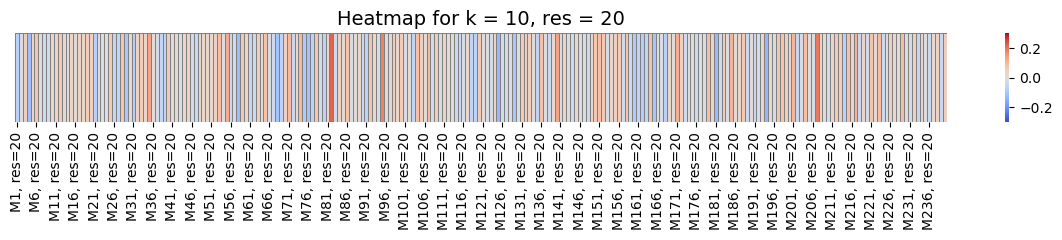

In [17]:
plt.figure(figsize=(12, 2.5))
sns.heatmap(plot_df,
            cmap='coolwarm',
            cbar=True,
            vmin=-0.3, vmax=0.3,
            linewidths=0.5,
            linecolor='gray',
            #annot=True,
            #fmt=".2f")
)

plt.title('Heatmap for k = 10, res = 20', fontsize=14)
plt.yticks([])  # Hide y-axis ticks
plt.xticks(rotation=90)
plt.xlabel('')
plt.tight_layout()
plt.show()